# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset given
import requests
import pandas as pd

df = pd.read_csv(r"C:\Users\invra\Downloads\census_income.csv")

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#checking the columns of the dataset
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#there are 15 columns in the datset and 9columns are of categorical and remaining are numerical

In [7]:
df.shape

(32560, 15)

there are 32560 rows and 15 columns

In [8]:
# Checking Null Values

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in the dataset

In [9]:
# Checking for duplicate data

df.duplicated().sum()

24

In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Length: 32560, dtype: bool

In [11]:
# dropping duplicate data

df.drop_duplicates(keep = 'first', inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [13]:
df.duplicated().sum()

0

In [14]:
#Duplicated rows are removed

In [15]:
# For creating seperate list for grouping the categorical columns
Cat_col =[]
for i in df.columns:
    if df[i].dtypes == "object":
        Cat_col.append(i)
print(Cat_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [16]:
# For creating seperate list for grouping the Numerical/continuos type columns
Num_col =[]
for i in df.columns:
    if df[i].dtypes != "object":
        Num_col.append(i)
print(Num_col)

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [17]:
#checking how many unique values/data in the workclass column
df['Workclass'].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [18]:
#checking how many unique values/data in the Education column
df['Education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [19]:
#checking how many unique values/data in the 'Marital_status' column
df['Marital_status'].unique()

array(['Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'],
      dtype=object)

In [20]:
#checking how many unique values/data in the 'Occupation' column
df['Occupation'].unique()

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [21]:
#checking how many unique values/data in the 'Sex' column
df['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
#checking how many unique values/data in the 'Income' column
df['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [23]:
# Unique value in each column
for i in df.columns:
  print("Unique values and their count in ", i ," column are: ")
  print(df[i].value_counts().sum)
  print("**"*50)


Unique values and their count in  Age  column are: 
<bound method NDFrame._add_numeric_operations.<locals>.sum of 36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64>
****************************************************************************************************
Unique values and their count in  Workclass  column are: 
<bound method NDFrame._add_numeric_operations.<locals>.sum of Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64>
****************************************************************************************************
Unique values and their count in  Fnlwgt  column are: 
<bound method NDFrame._add_numeric_operations.<locals>.sum of 123011    13
164190    13
203488   

There are some places where there is "?" in place of the attribute, in country, work class, country columns


In [24]:
#First we replace them with NAN and then we will handle these later

In [25]:
df.isin(['NAN','NA','N/A','-',' ','?','--',' ?']).sum().any()

True

In [26]:
df['Workclass'] = df['Workclass'].replace(' ?',np.nan)

In [27]:
#checking how many unique values/data in the 'Workclass' column
df['Workclass'].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [28]:
df['Occupation'] = df['Occupation'].replace(' ?',np.nan)

In [29]:
df['Native_country'] = df['Native_country'].replace(' ?',np.nan)

In [30]:
#checking how many unique values/data in the 'Occupation' column
df['Occupation'].unique()

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [31]:
#checking how many unique values/data in the 'Native_country' column
df['Native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [32]:
# Unique value in each column
for i in df.columns:
  print("Unique values and their count in ", i ," column are: ")
  print(df[i].value_counts().sum)
  print("**"*50)


Unique values and their count in  Age  column are: 
<bound method NDFrame._add_numeric_operations.<locals>.sum of 36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64>
****************************************************************************************************
Unique values and their count in  Workclass  column are: 
<bound method NDFrame._add_numeric_operations.<locals>.sum of Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64>
****************************************************************************************************
Unique values and their count in  Fnlwgt  column are: 
<bound method NDFrame._add_numeric_operations.<locals>.sum of 123011    13
164190    13
203488   

In [33]:
# Checking for null values

df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [34]:
# as the NAN/ missing values are very less compared to whole dataset, we can drop the missing values
df.dropna(inplace=True)

In [35]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

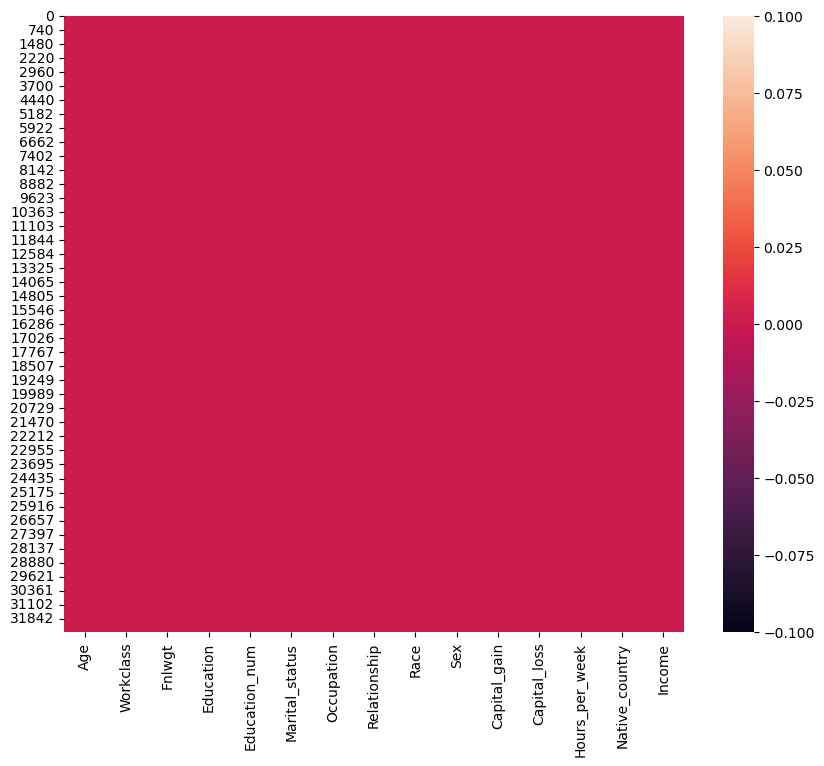

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [37]:
#All the missing values are dropped

In [38]:
df.shape

(32536, 15)

We lost around 2400 crows of data


# **DATA ANALYSIS**

**UNIVARIATE **ANALYSIS**

In [39]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [40]:
df['Age'].value_counts()

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

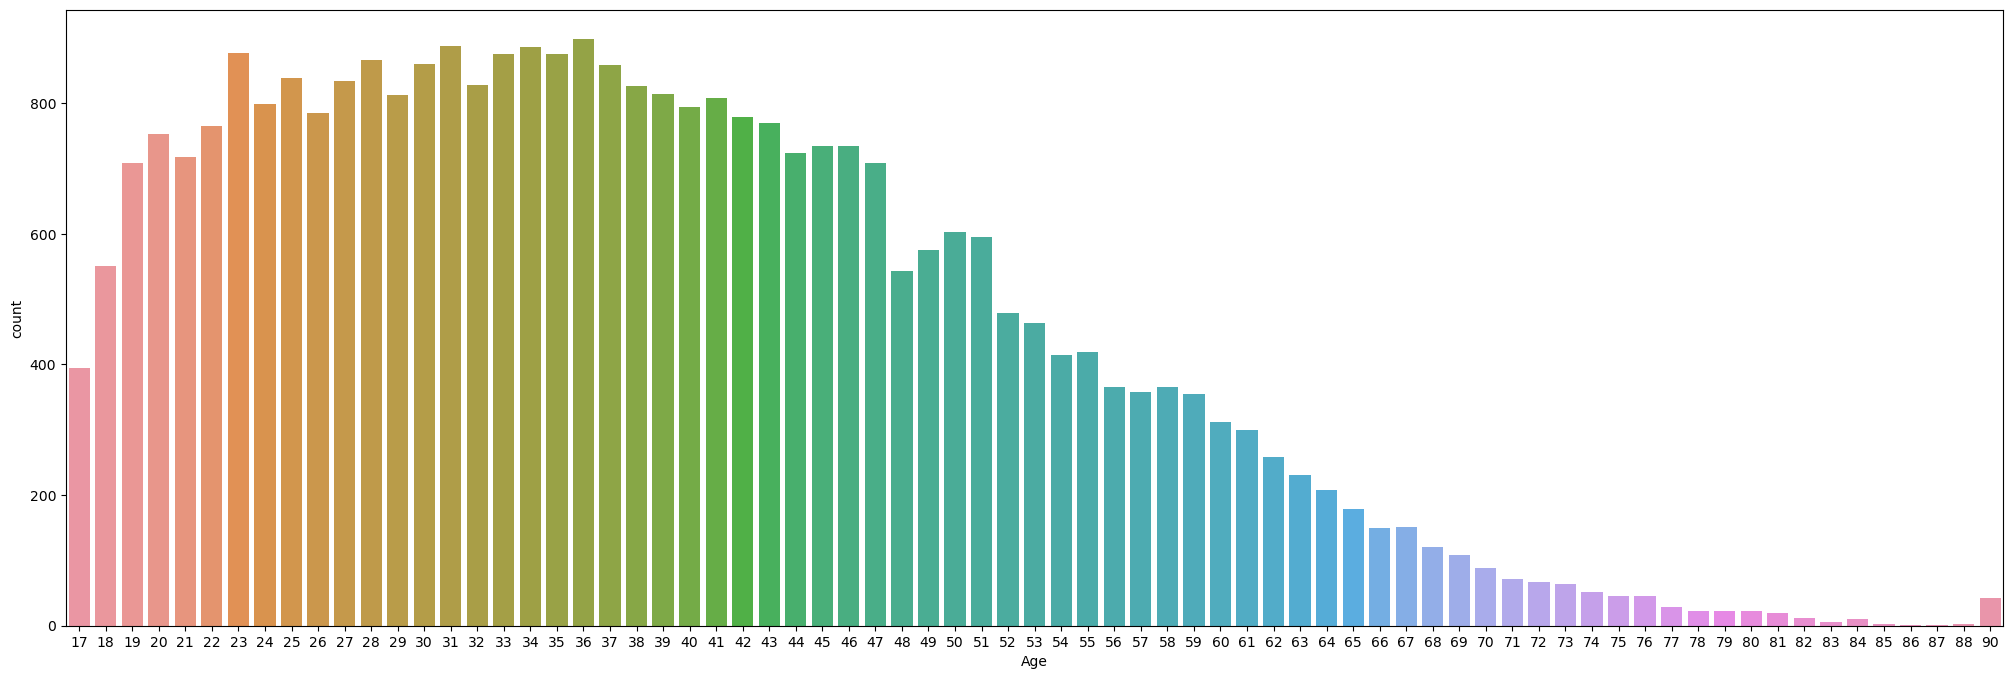

In [41]:
#count plot for 'Age' feature
plt.figure(figsize=(25,8))
sns.countplot(x='Age',data=df)

THis dataset has most data from 23-47 age group people

<AxesSubplot:xlabel='Workclass', ylabel='count'>

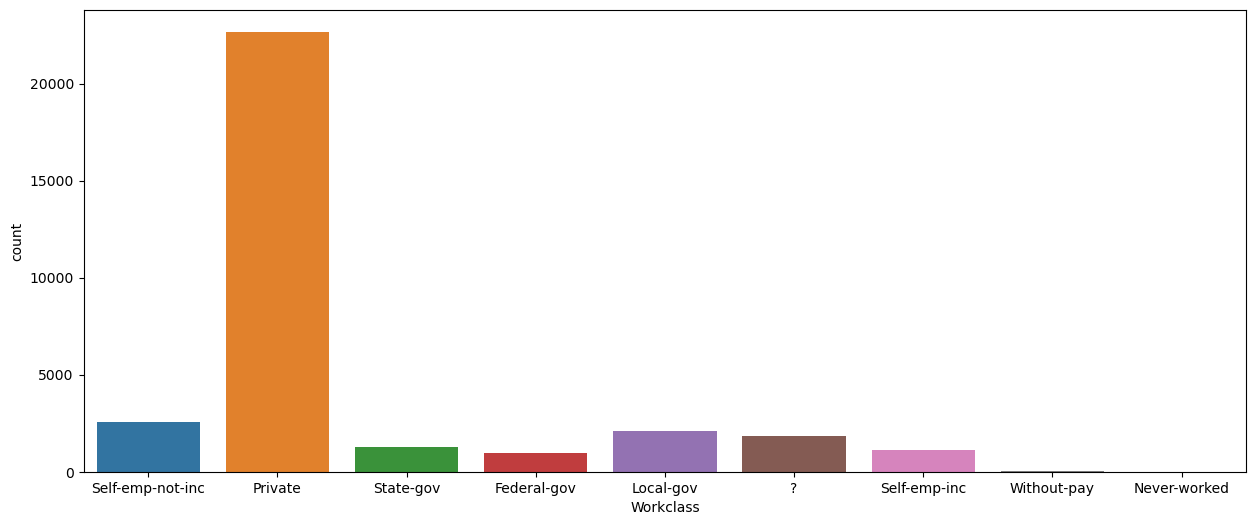

In [42]:
#count plot for 'Workclass' feature
plt.figure(figsize=(15,6))
sns.countplot(x='Workclass',data=df)

Most of the poeple are from private workclass

In [43]:
df['Workclass'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

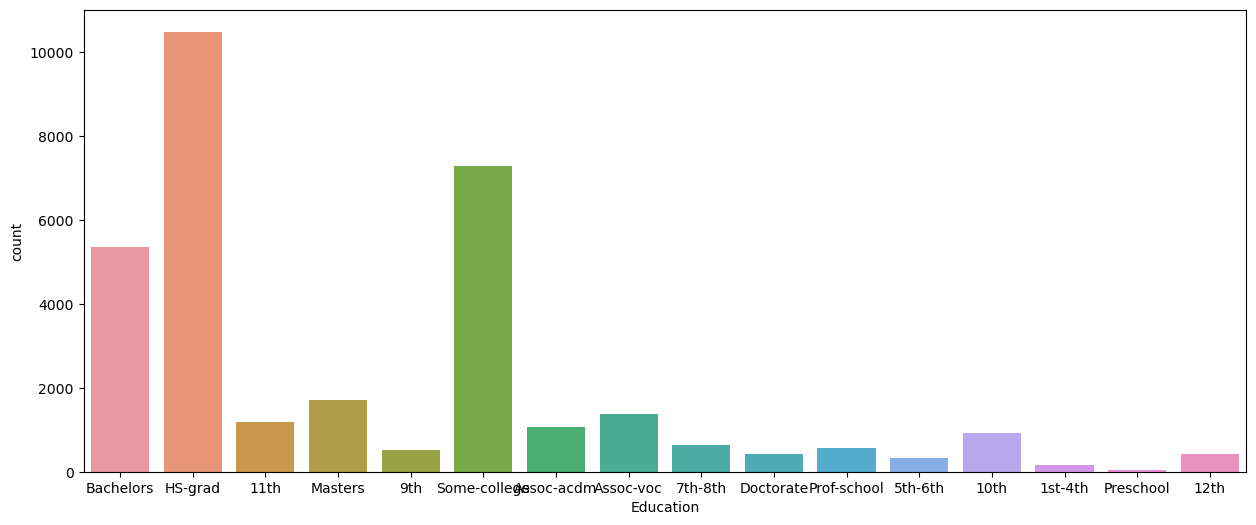

In [44]:
#count plot for 'Education' feature
plt.figure(figsize=(15,6))
sns.countplot(x='Education',data=df)

Most of the people are of BAchelors,HS-Grade and some college education

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

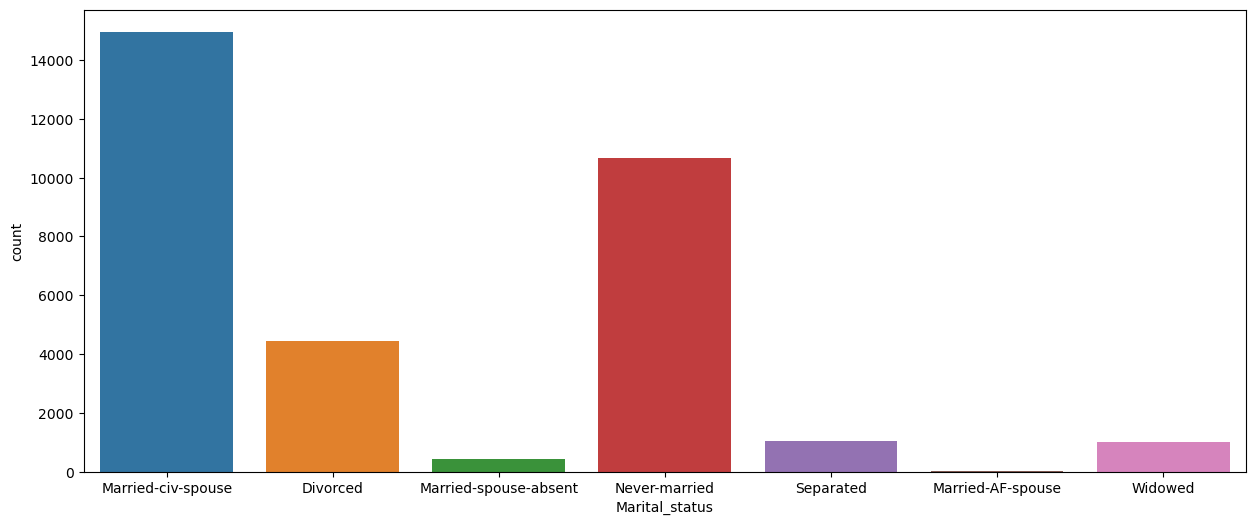

In [45]:
#count plot for 'Marital_status' feature
plt.figure(figsize=(15,6))
sns.countplot(x='Marital_status',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

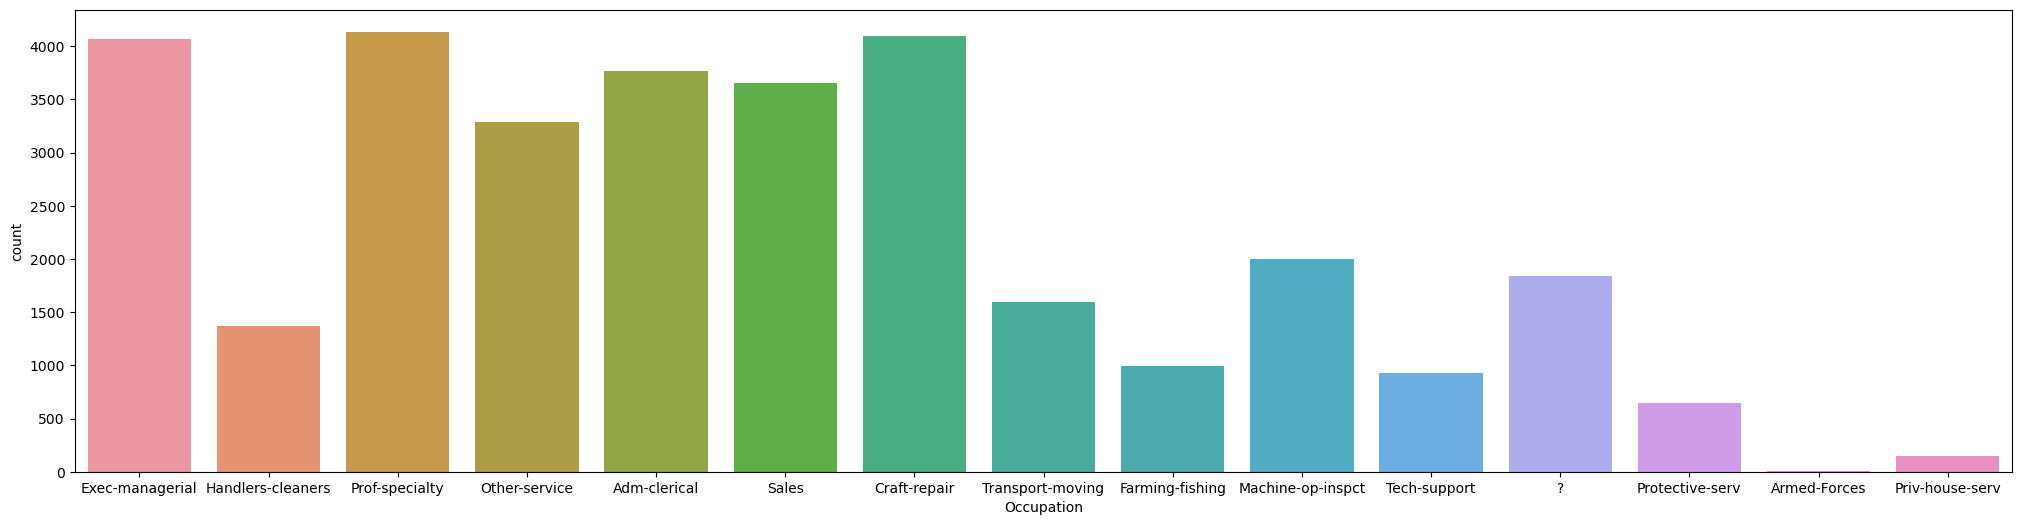

In [46]:
#count plot for 'Occupation' feature
plt.figure(figsize=(25,6))
sns.countplot(x='Occupation',data=df)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

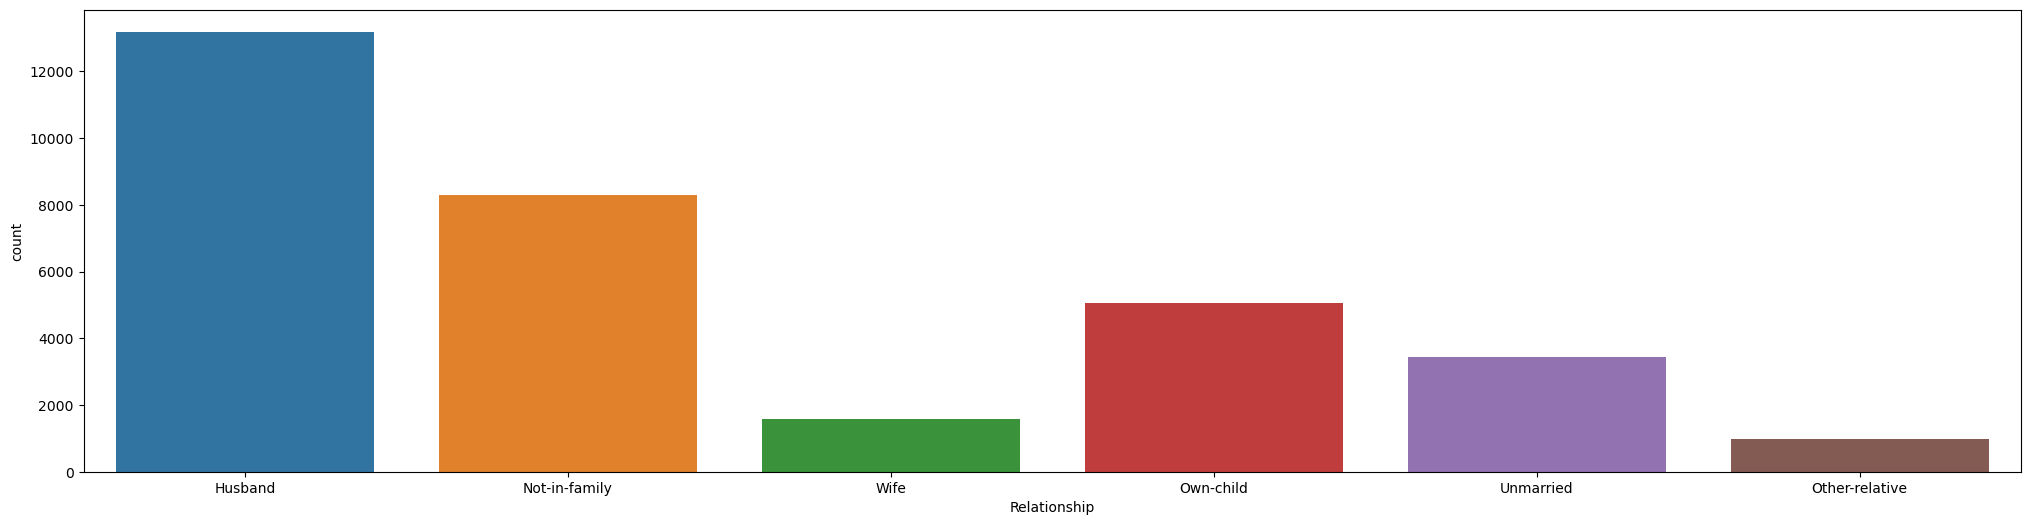

In [47]:
#count plot for 'Relationship' feature
plt.figure(figsize=(25,6))
sns.countplot(x='Relationship',data=df)

<AxesSubplot:xlabel='Race', ylabel='count'>

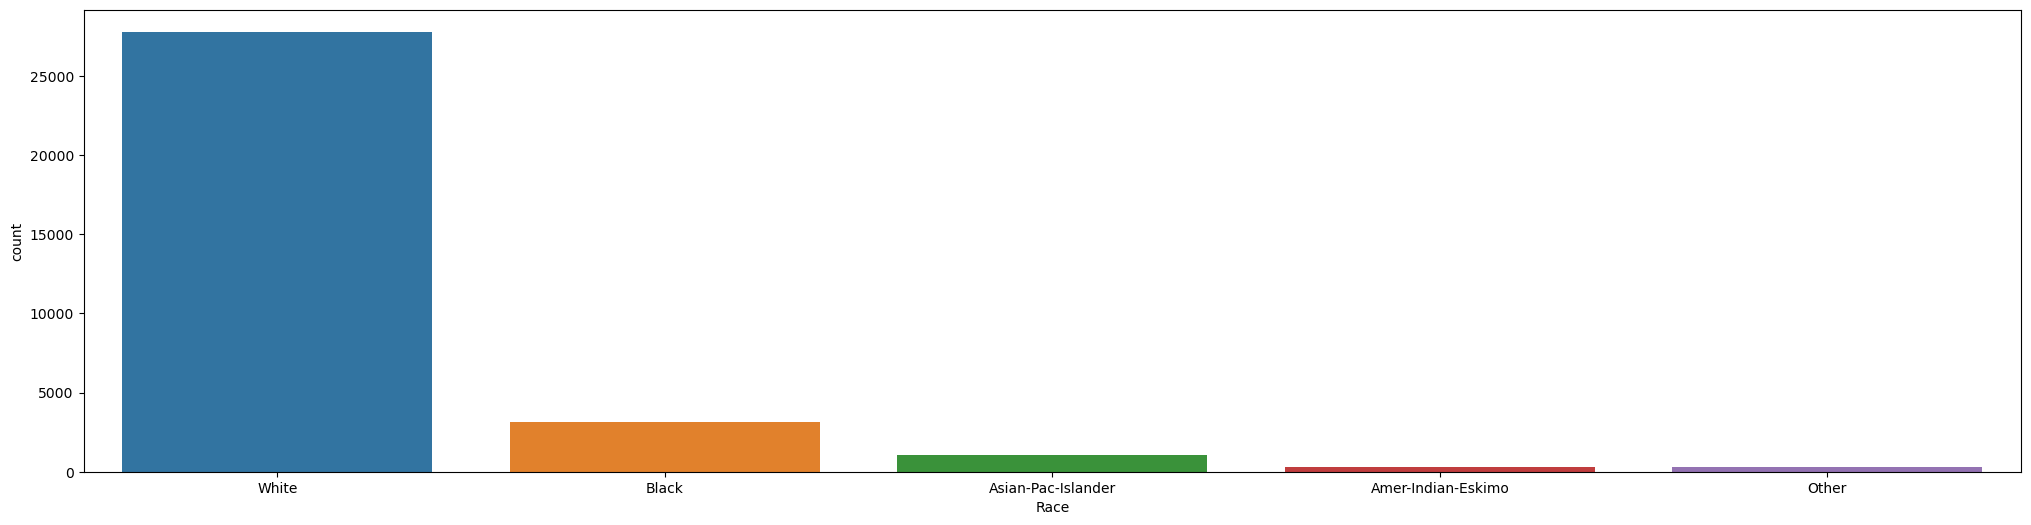

In [48]:
#count plot for 'Race' feature
plt.figure(figsize=(25,6))
sns.countplot(x='Race',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

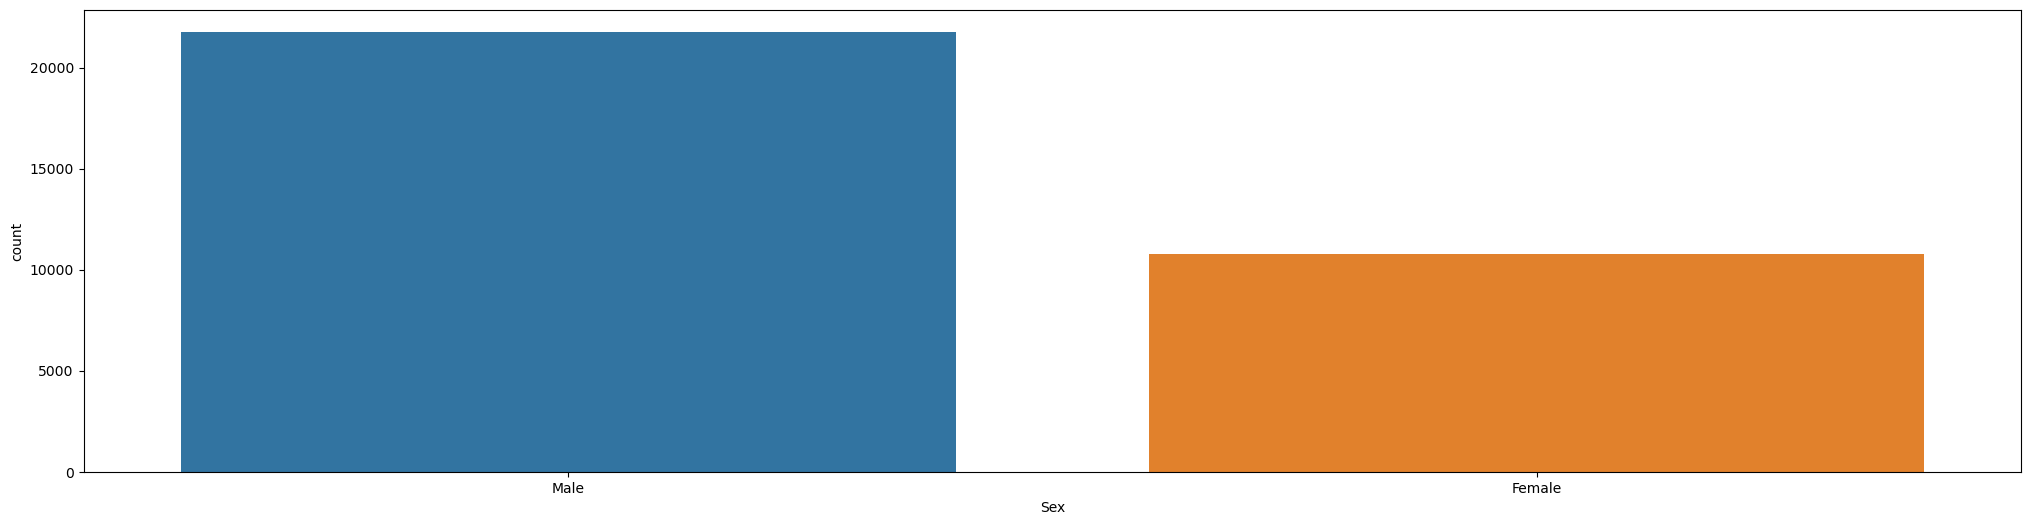

In [49]:
#count plot for 'Sex' feature
plt.figure(figsize=(25,6))
sns.countplot(x='Sex',data=df)

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

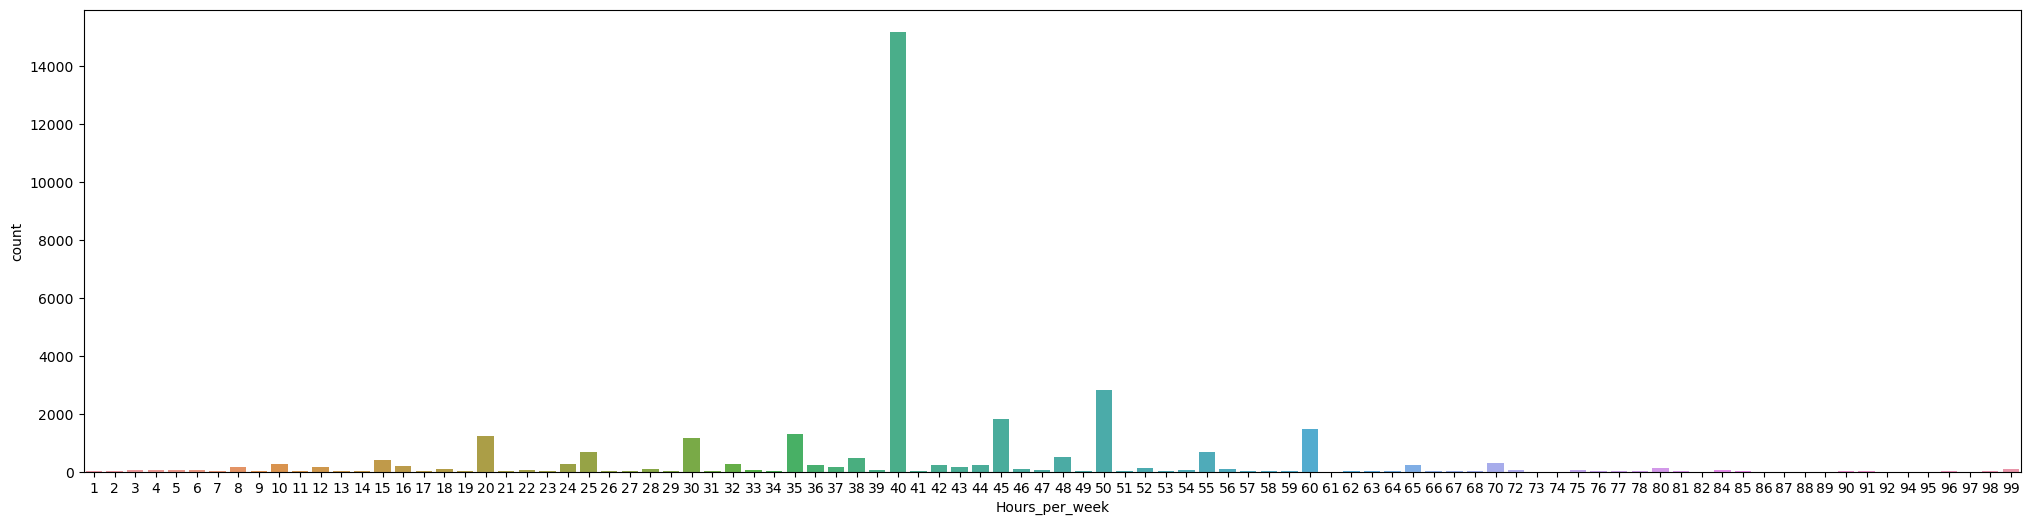

In [50]:
#count plot for 'Hours_per_week' feature
plt.figure(figsize=(25,6))
sns.countplot(x='Hours_per_week',data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

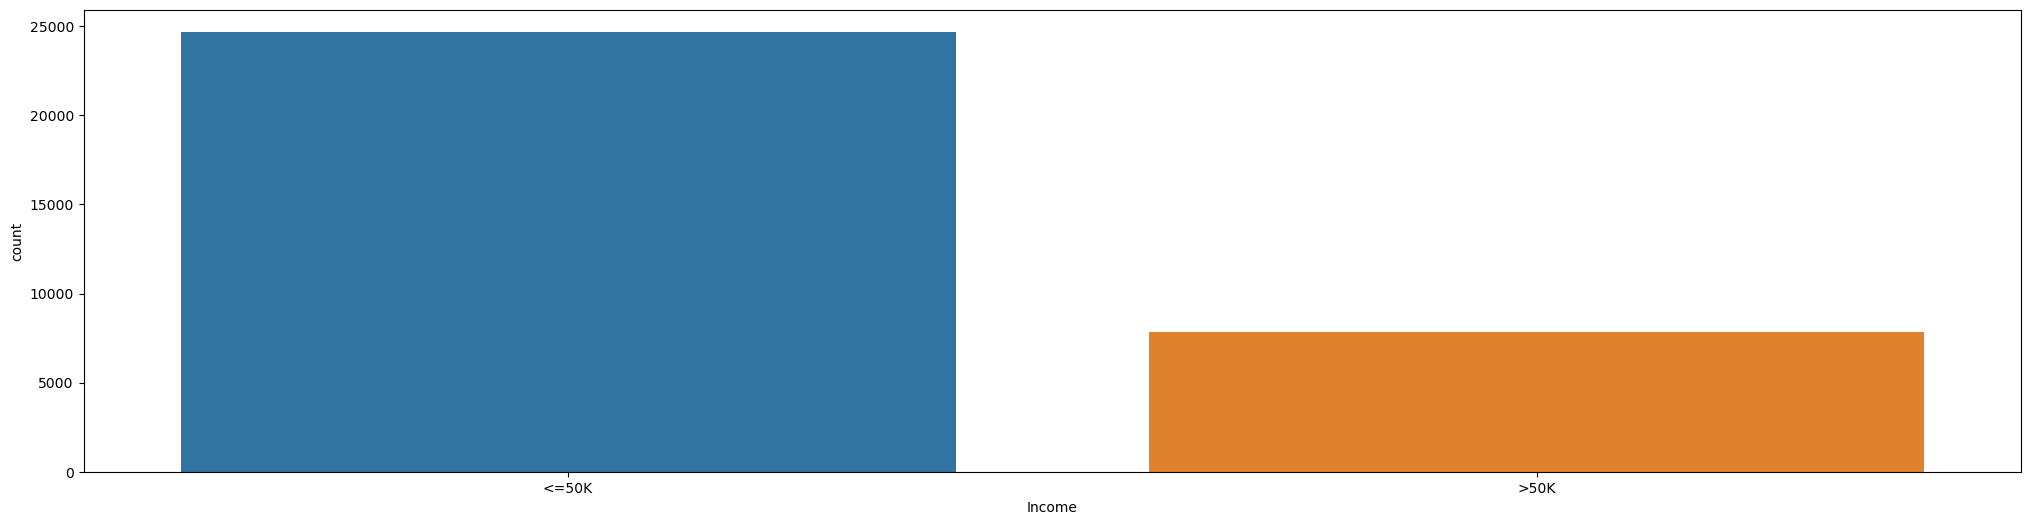

In [51]:
#count plot for 'Income' feature
plt.figure(figsize=(25,6))
sns.countplot(x='Income',data=df)

# **BI VARIATE ANALYSIS**

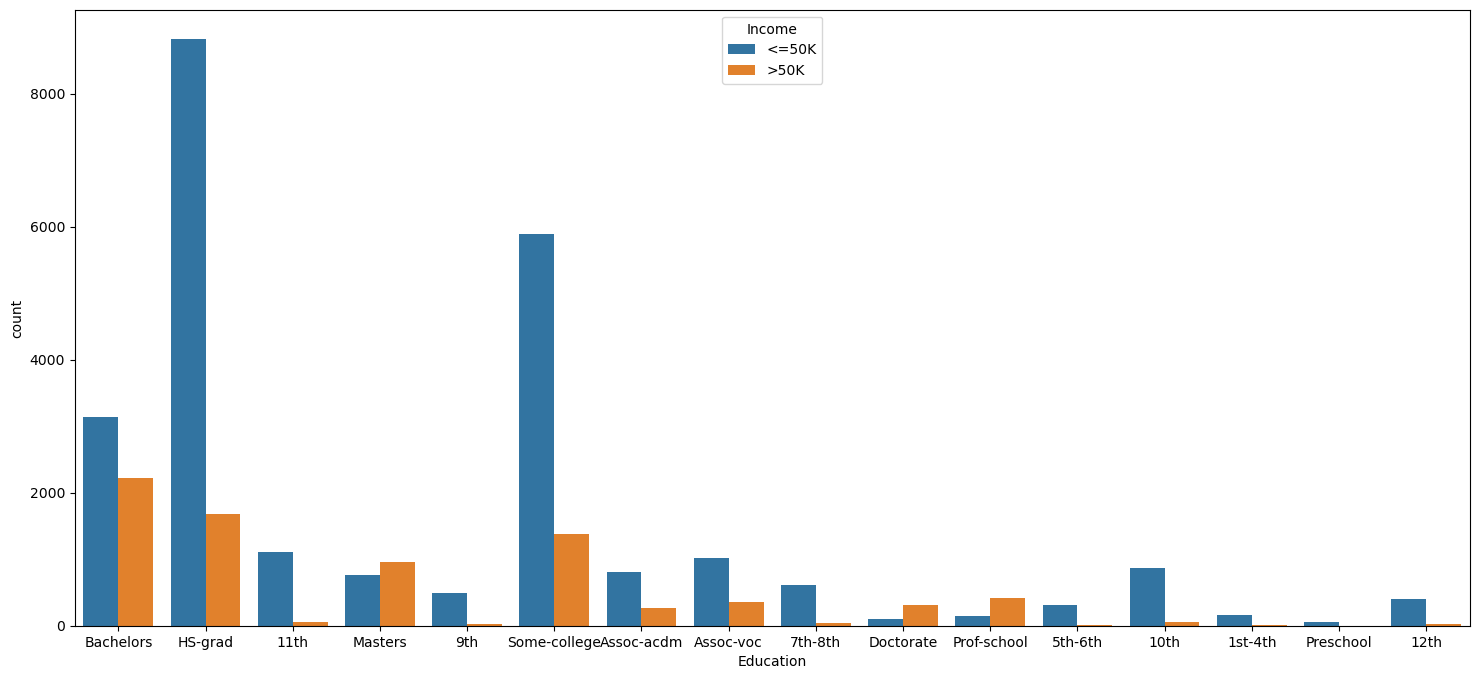

In [52]:
plt.figure(figsize=(18,8))
sns.countplot(x='Education', hue='Income', data = df)
plt.show()

Pople with Bachelors degree are more with income >50K, and HS-Grade education level employees are high with <=50k income

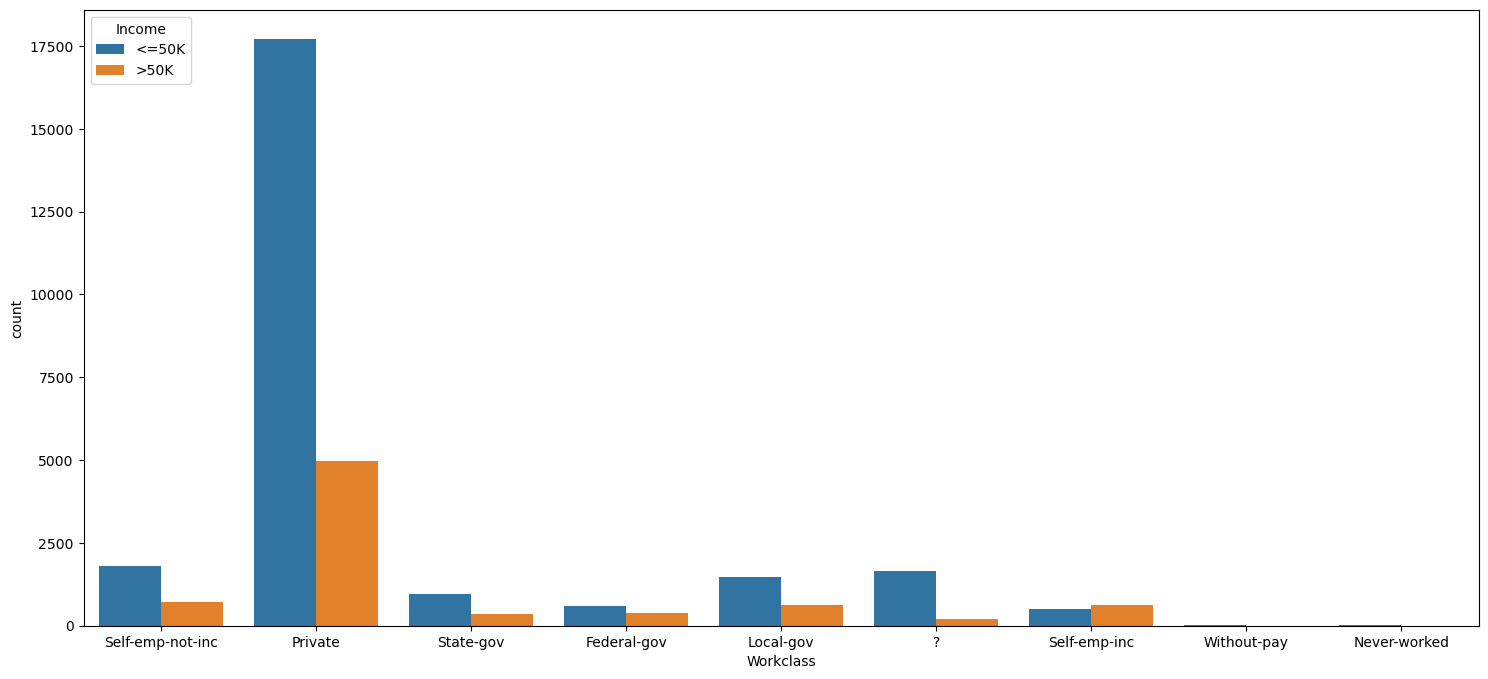

In [53]:
plt.figure(figsize=(18,8))
sns.countplot(x='Workclass', hue='Income', data = df)
plt.show()

**Private employees are more in both categories of Income**

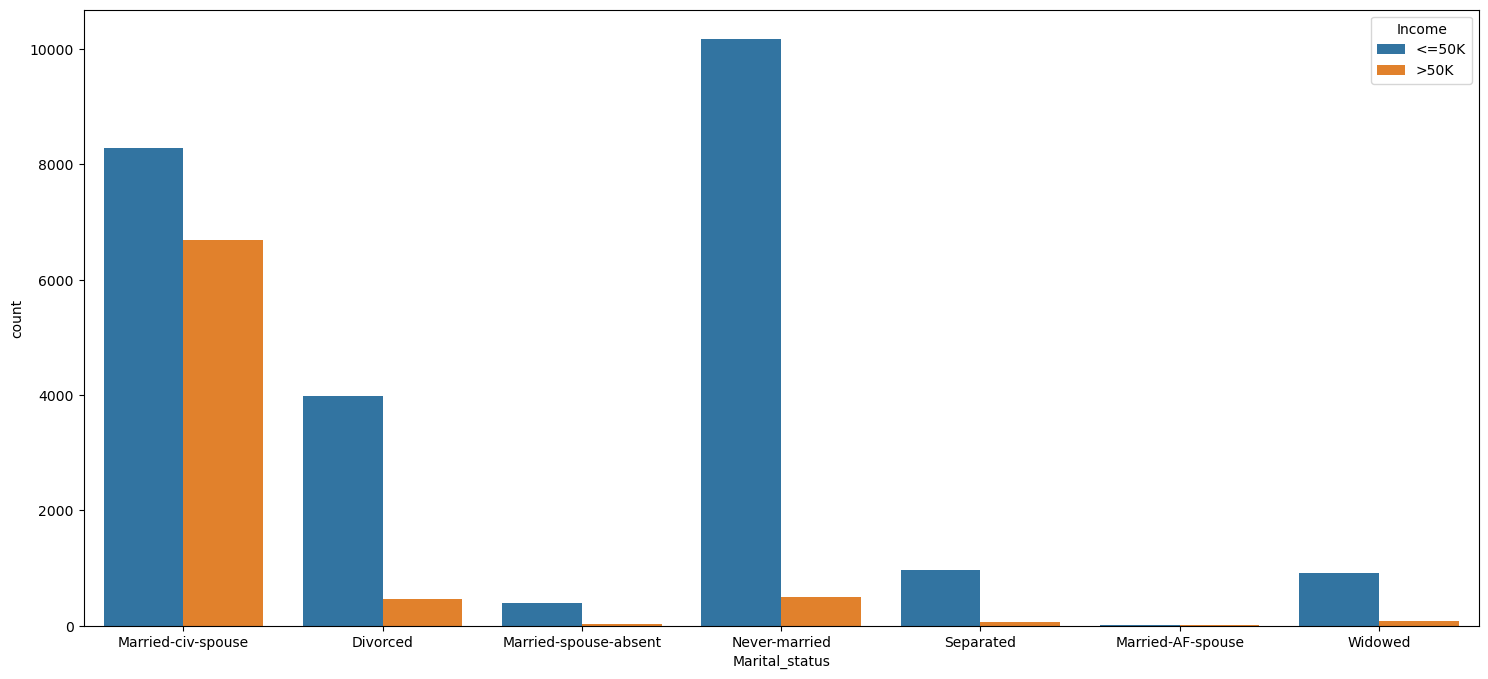

In [54]:
plt.figure(figsize=(18,8))
sns.countplot(x='Marital_status', hue='Income', data = df)
plt.show()

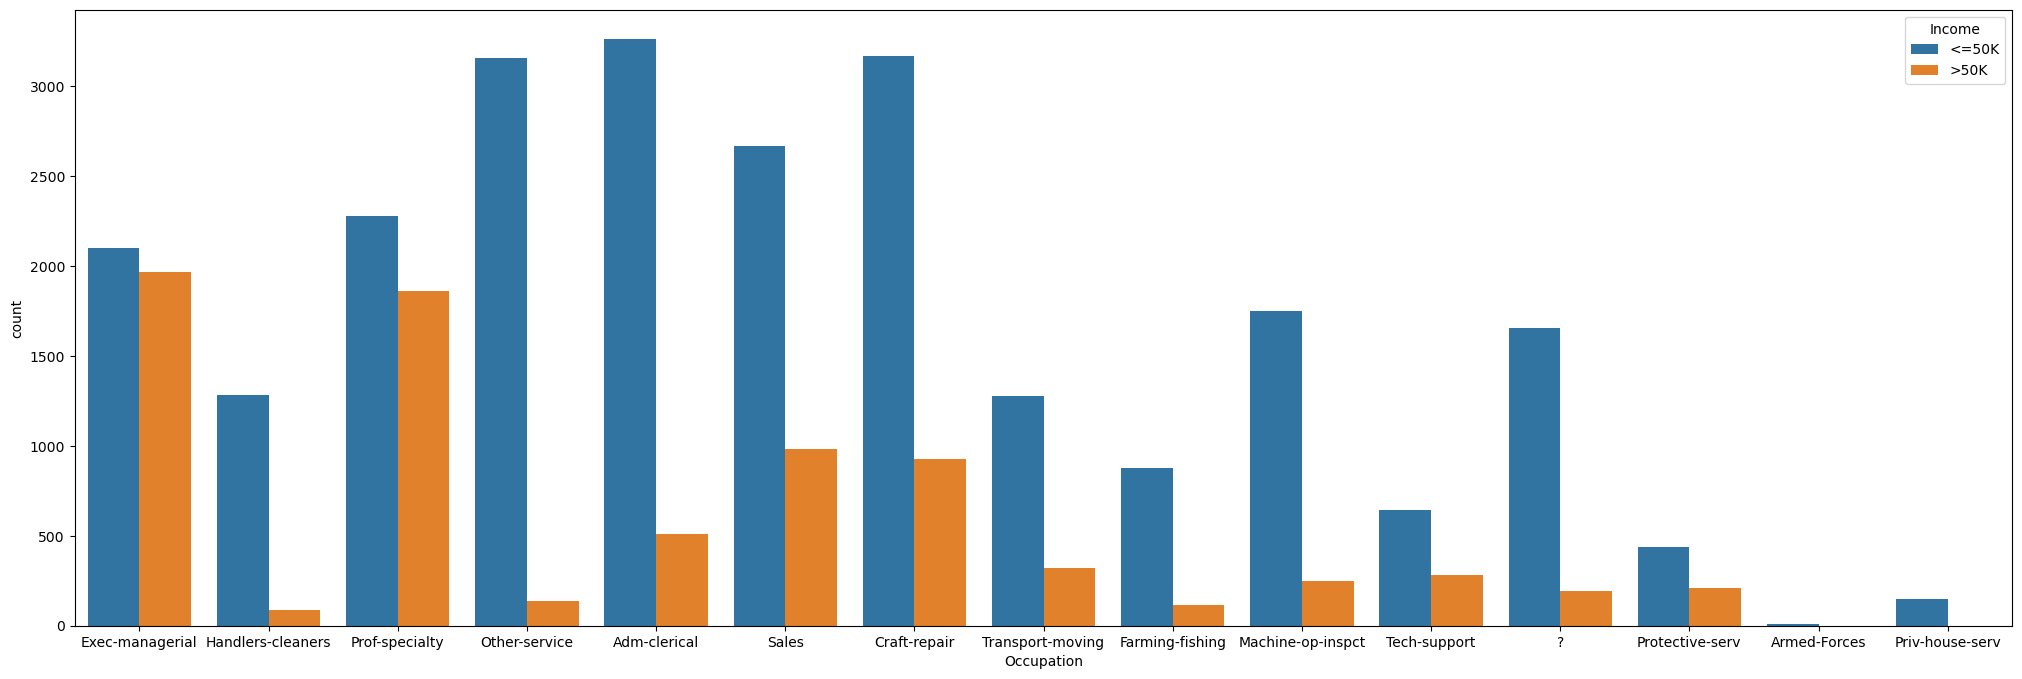

In [55]:
plt.figure(figsize=(25,8))
sns.countplot(x='Occupation', hue='Income', data = df)
plt.show()

Exec-managerial and Prof-speciality work people are earning more compared to others

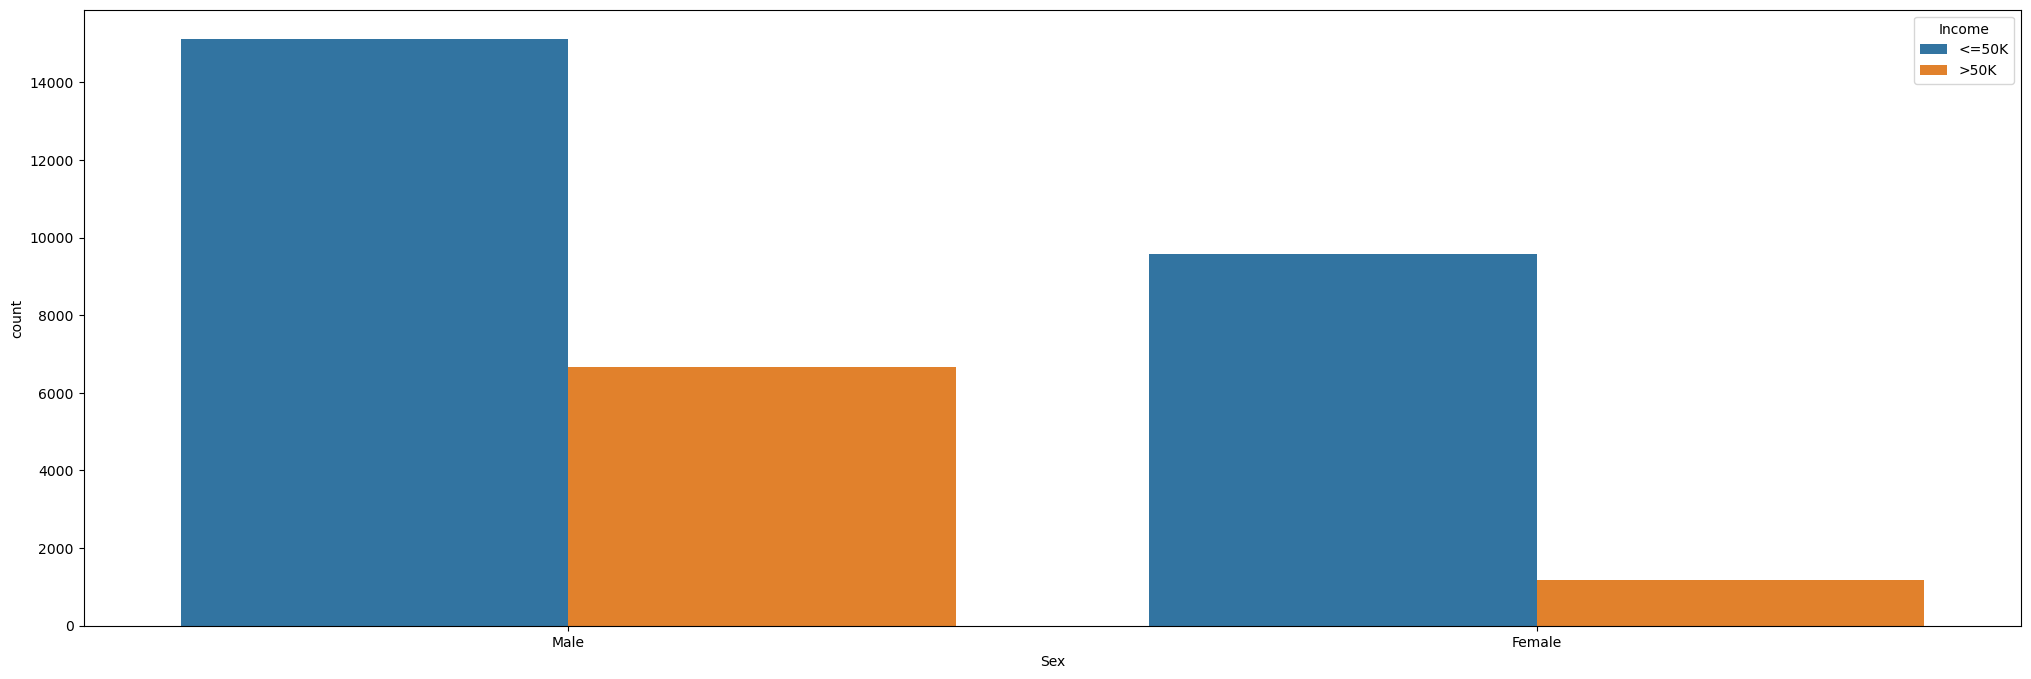

In [56]:
plt.figure(figsize=(25,8))
sns.countplot(x='Sex', hue='Income', data = df)
plt.show()

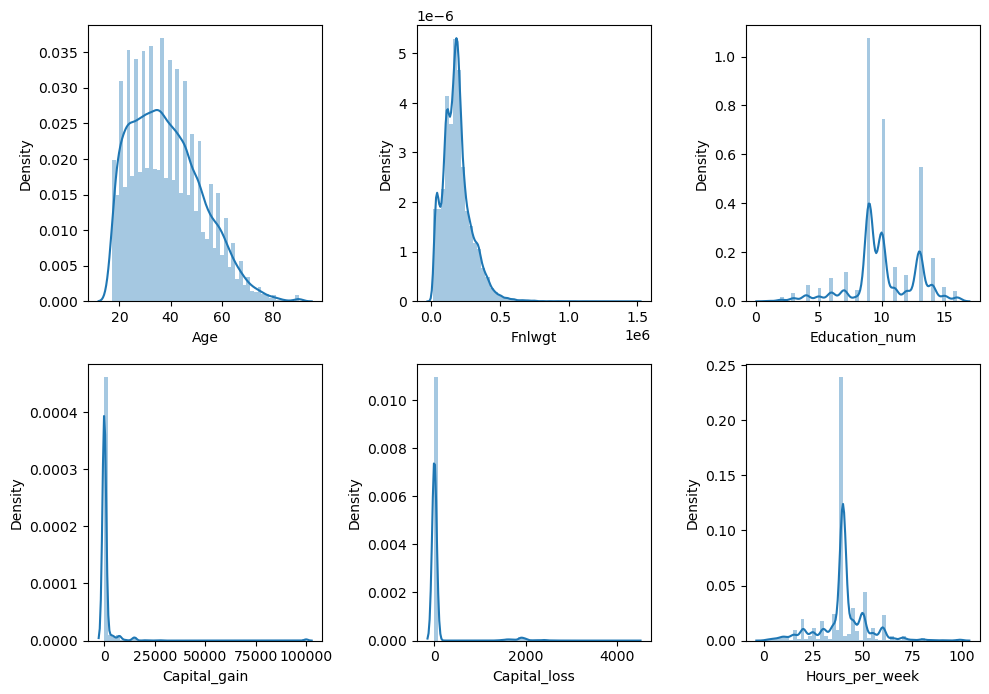

In [57]:
plt.figure(figsize=(10,10))
for i in range(len(Num_col)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[Num_col[i]])
    plt.tight_layout()

In [58]:
df[['Education_num', 'Education','Income']].value_counts().reset_index().sort_values(by='Education_num')

,Education_num,Education,Income,0
25,1,Preschool,<=50K,50
30,2,1st-4th,>50K,6
20,2,1st-4th,<=50K,160
17,3,5th-6th,<=50K,316
29,3,5th-6th,>50K,16
26,4,7th-8th,>50K,40
12,4,7th-8th,<=50K,605
28,5,9th,>50K,27
13,5,9th,<=50K,487
23,6,10th,>50K,62


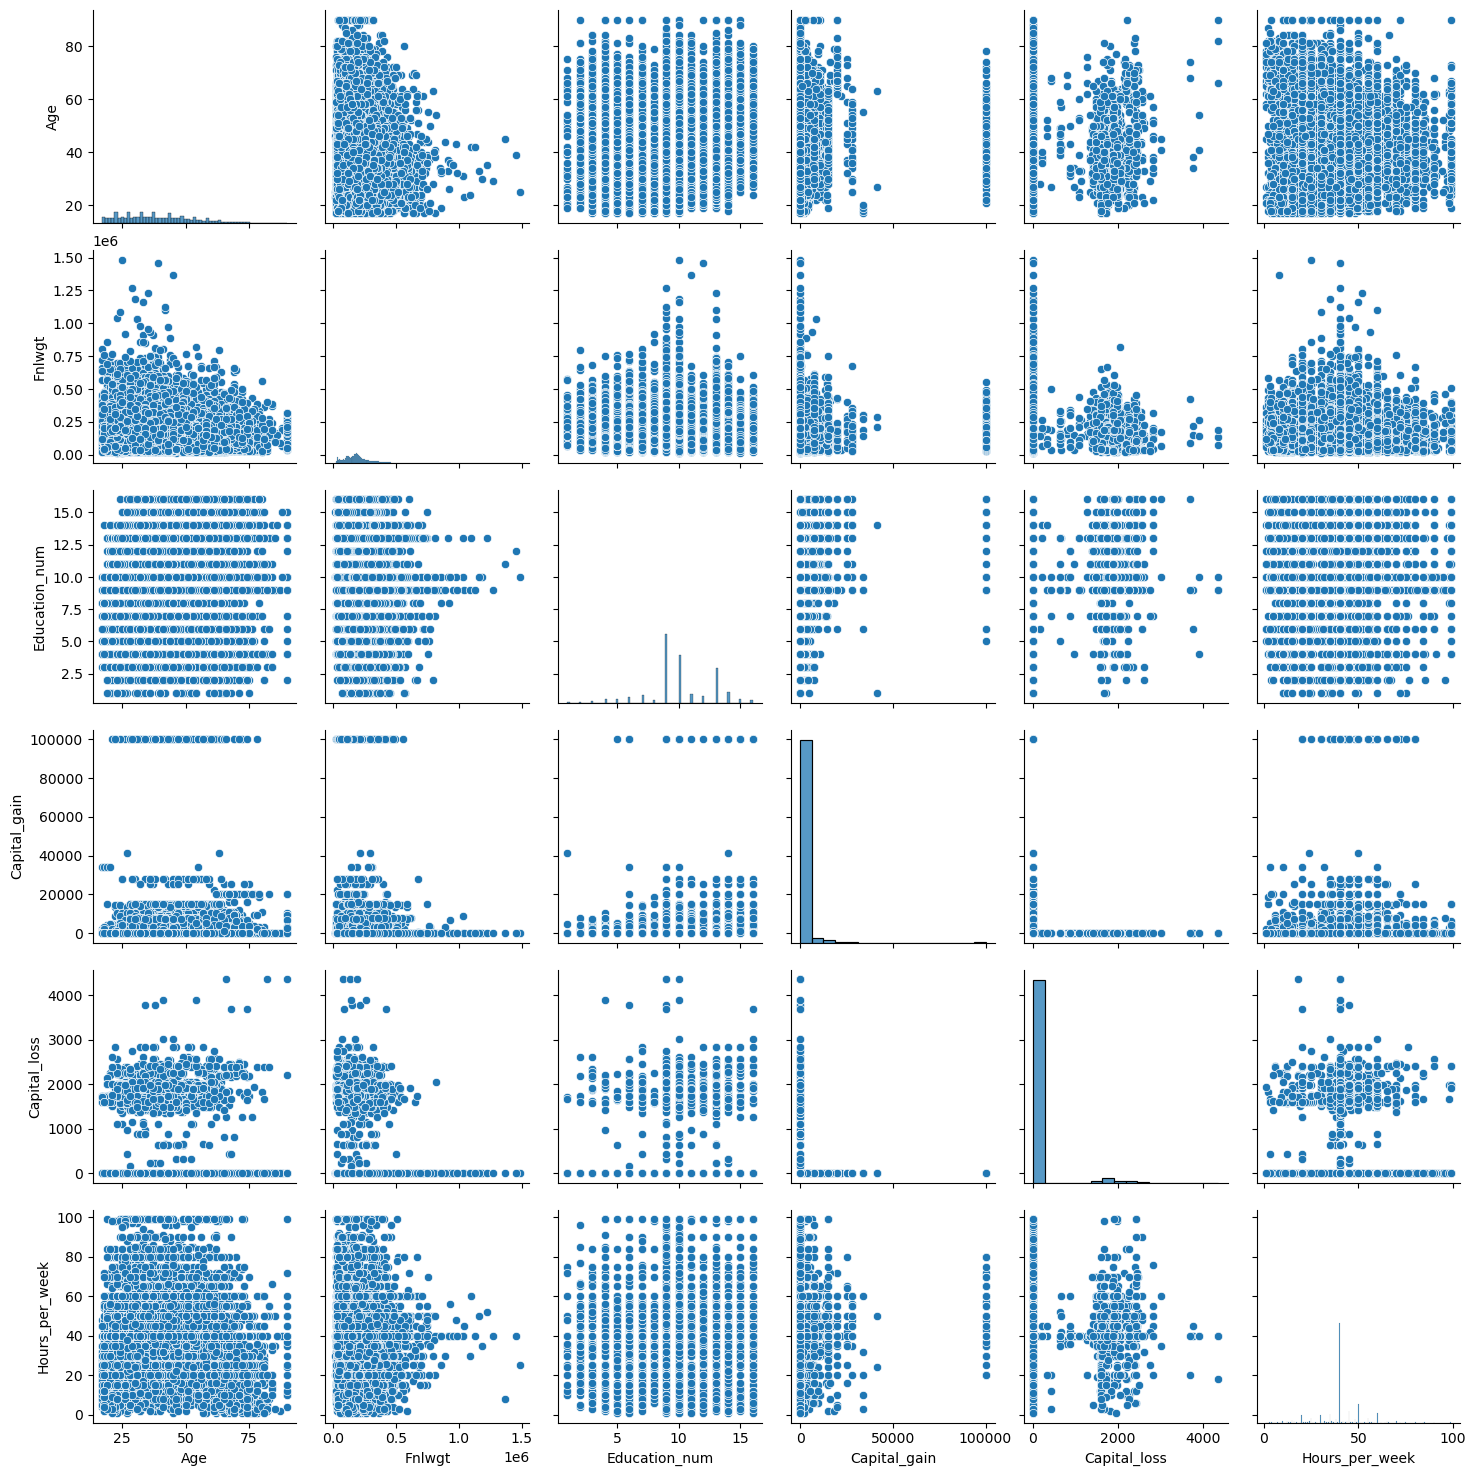

In [59]:
sns.pairplot(df)

# **Checking For Outliers**

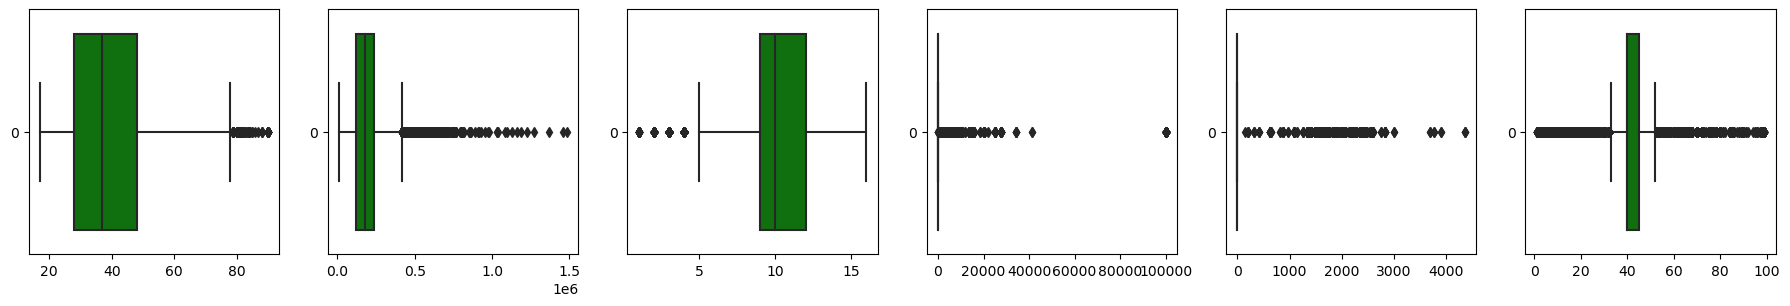

In [60]:
#checking with Boxplots
nrows = 14
ncol = len(Num_col)
plt.figure(figsize=(3*ncol, 3*nrows))

# Loop over the numerical columns and plot a boxplot for each one
for i, col in enumerate(Num_col):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(data=df[col], color='green', orient='h')
    plt.tight_layout()

There are outliers in all the numerical columns

In [61]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515
Fnlwgt,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900
Education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426
Capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408
Capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229
Hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000


# **ZSCORE METHOD**

In [62]:
from scipy.stats import zscore

z=np.abs(zscore(df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]))
print(np.where(z>3))

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64), array([5, 4, 5, ..., 0, 5, 5], dtype=int64))


In [63]:
z = np.abs(zscore(df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]))
threshold = 3
dfn = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", dfn.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-dfn.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (32536, 15)
Shape of the dataframe after removing outliers:  (29808, 15)
Percentage of data loss post outlier removal:  8.384558642734202


# **IQR METHOD**

In [64]:
variables = df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]

#1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

#IQR
IQR=Q3 - Q1
dfs=df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

In [65]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", dfs.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-dfs.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (32536, 15)
Shape of the dataframe after removing outliers:  (18983, 15)
Percentage of data loss post outlier removal:  41.65539709859847


There is only 8% data loss in ZSCORE method, wheere as there is 38% data loss in IQR method. so we will continue with ZSCORE method

In [66]:
# Check Skewness
dfn.skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
dtype: float64

In [67]:
skew_cols=['Age','Fnlwgt','Capital_gain','Capital_loss']

In [68]:
#Removing the Skewness

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
dfn[skew_cols] = scaler.fit_transform(dfn[skew_cols].values)

In [69]:
#Checking the skewness again

dfn.skew()

Age               -0.017077
Fnlwgt            -0.034773
Education_num     -0.169811
Capital_gain       3.072803
Capital_loss      24.860889
Hours_per_week    -0.353124
dtype: float64

In [70]:
dfn.drop(['Capital_gain',"Capital_loss"],axis=1,inplace=True)

In [71]:
dfn.skew()

Age              -0.017077
Fnlwgt           -0.034773
Education_num    -0.169811
Hours_per_week   -0.353124
dtype: float64

Skewness is removed

In [72]:
# Encoding use getdummies and label encoder.
# using label encoder for ordinal and nominal with many records as native_country and itworks good with unbalance techniques
cat_label_encoder=['Workclass','Education','Occupation','Native_country',"Income"]
from sklearn.preprocessing import StandardScaler,PowerTransformer,LabelEncoder

lenc = {}

for column in cat_label_encoder:
    lenc[column] = LabelEncoder()
    dfn[column] = lenc[column].fit_transform(dfn[column])

In [73]:
dfn.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,0.928278,6,-1.114017,8,13,Married-civ-spouse,4,Husband,White,Male,13,38,0
1,0.130080,4,0.425181,10,9,Divorced,6,Not-in-family,White,Male,40,38,0
2,1.103227,4,0.605059,1,7,Married-civ-spouse,6,Husband,Black,Male,40,38,0
3,-0.709117,4,1.484239,8,13,Married-civ-spouse,10,Wife,Black,Female,40,5,0
4,0.054756,4,1.046089,11,14,Married-civ-spouse,4,Wife,White,Female,40,38,0


In [74]:
# Encoding using getdummies
nominal_col=['Marital_status','Relationship','Race','Sex']
dfnew=pd.get_dummies(dfn,columns=nominal_col, drop_first=True)

In [75]:
dfnew.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Occupation,Hours_per_week,Native_country,Income,Marital_status_Married-AF-spouse,...,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Male
0,0.928278,6,-1.114017,8,13,4,13,38,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0.130080,4,0.425181,10,9,6,40,38,0,0,...,1,0,0,0,0,0,0,0,1,1
2,1.103227,4,0.605059,1,7,6,40,38,0,0,...,0,0,0,0,0,0,1,0,0,1
3,-0.709117,4,1.484239,8,13,10,40,5,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0.054756,4,1.046089,11,14,4,40,38,0,0,...,0,0,0,0,1,0,0,0,1,0


In [76]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29808 entries, 0 to 32559
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   29808 non-null  float64
 1   Workclass                             29808 non-null  int32  
 2   Fnlwgt                                29808 non-null  float64
 3   Education                             29808 non-null  int32  
 4   Education_num                         29808 non-null  int64  
 5   Occupation                            29808 non-null  int32  
 6   Hours_per_week                        29808 non-null  int64  
 7   Native_country                        29808 non-null  int32  
 8   Income                                29808 non-null  int32  
 9   Marital_status_Married-AF-spouse      29808 non-null  uint8  
 10  Marital_status_Married-civ-spouse     29808 non-null  uint8  
 11  Marital_status_

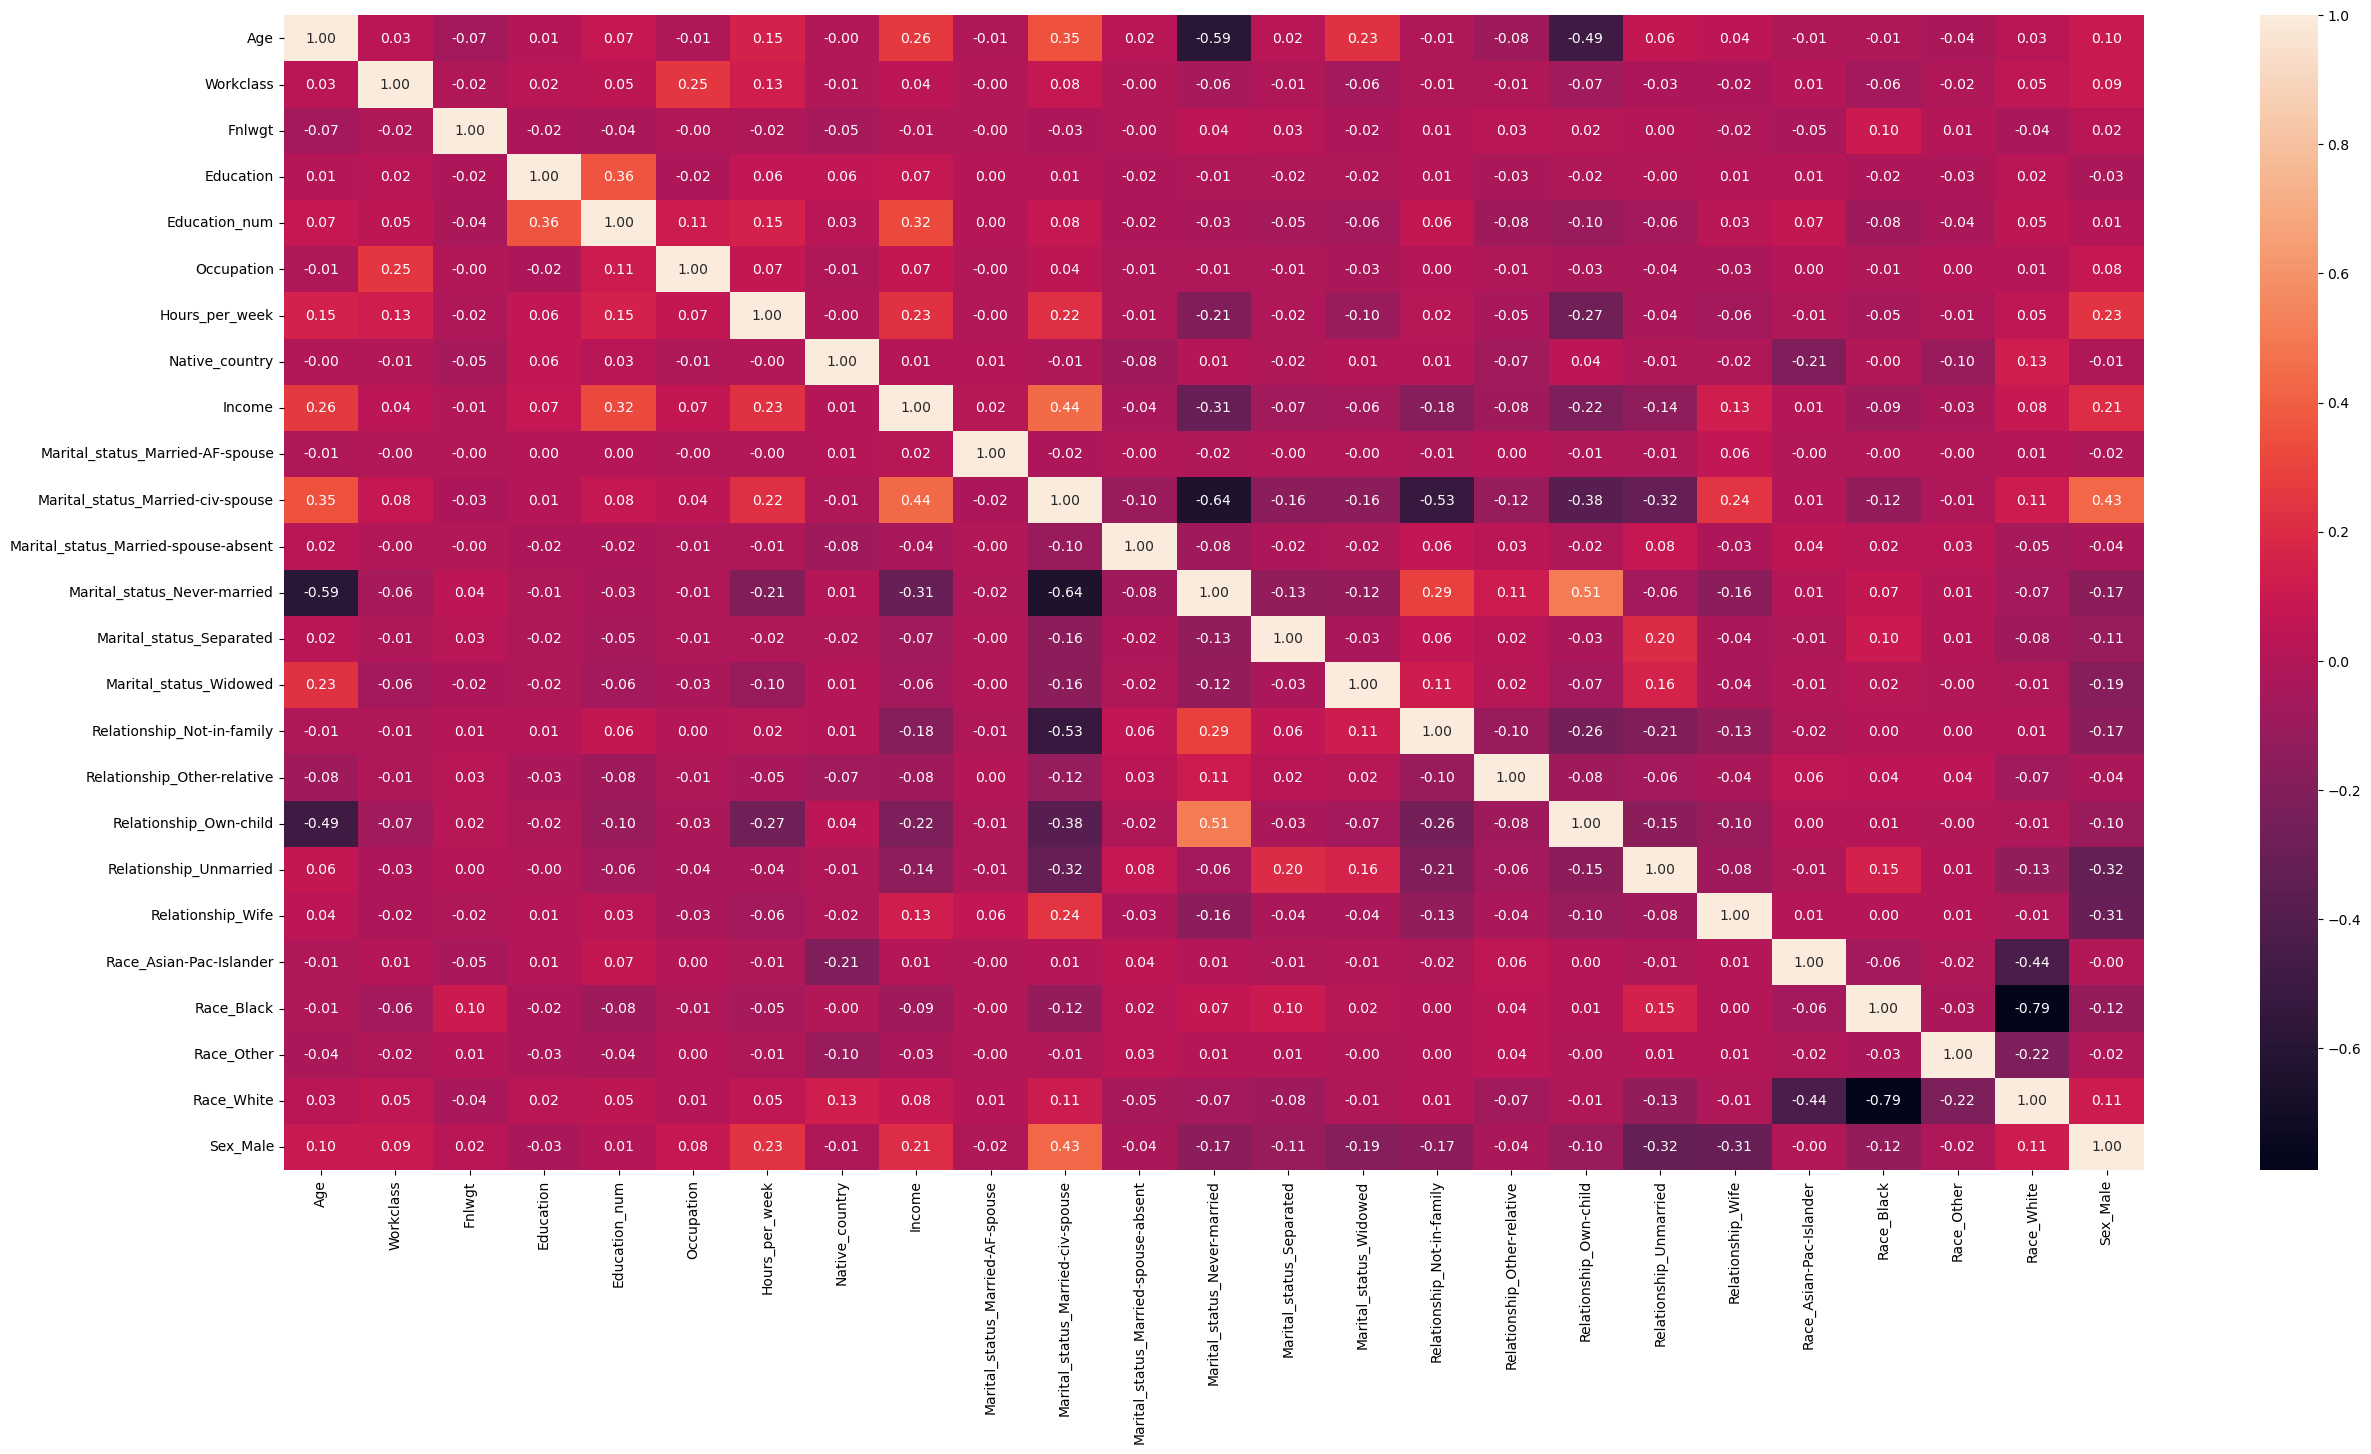

In [77]:
# heatmap correlation
plt.figure(figsize = (30,15))
sns.heatmap(dfnew.corr(), annot=True,fmt='.2f')
plt.show()

<AxesSubplot:xlabel='Income', ylabel='count'>

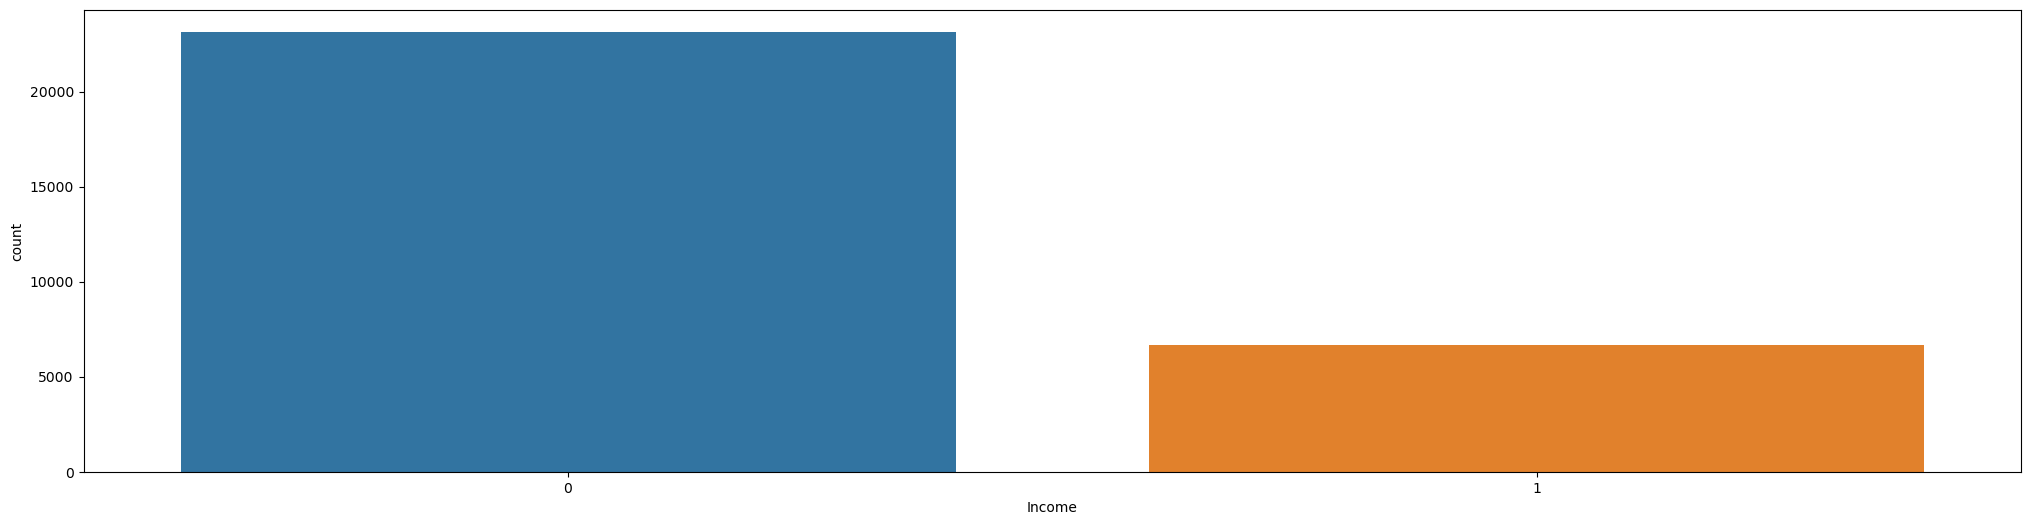

In [99]:
#count plot for 'Income' feature
plt.figure(figsize=(25,6))
sns.countplot(x='Income',data=dfnew)

# **SPLITTING DATA INTO INPUT OUTPUT**

In [79]:
x = dfnew.drop("Income", axis=1)
y = dfnew["Income"]

x.shape, y.shape

((29808, 24), (29808,))

we need to balance the target data

In [80]:
#importing smote library
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [81]:
#Applying SMOTE technique on DATa
X,Y=sm.fit_resample(x,y)

X.shape, Y.shape

((46312, 24), (46312,))

In [82]:
Y.value_counts()

0    23156
1    23156
Name: Income, dtype: int64

Now the data is balanced

# **Splitting the data for training and testing:**

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [84]:
# To Find the best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(X_train,Y_train)
    pred= LR.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8389290726546476 on Random State = 31


In [85]:
#selecting Random State 31

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=31,test_size=.20)

In [86]:
#importing all reuired machine learning algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [88]:
#Trying different algorithms for training & testing
for i in model:
    i.fit(X_train,Y_train)
    i.score(X_train,Y_train)
    pred= i.predict(X_test)
    print('Accuracy_Score of ',i, 'is', accuracy_score(Y_test,pred)*100)
    print('Confusion Matrix of ',i,' is \n', confusion_matrix(Y_test,pred) )
    print(classification_report(Y_test,pred))
    print('=='*40)

Accuracy_Score of  LogisticRegression() is 83.89290726546476
Confusion Matrix of  LogisticRegression()  is 
 [[3640  941]
 [ 551 4131]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4581
           1       0.81      0.88      0.85      4682

    accuracy                           0.84      9263
   macro avg       0.84      0.84      0.84      9263
weighted avg       0.84      0.84      0.84      9263

Accuracy_Score of  RidgeClassifier() is 82.58663499946022
Confusion Matrix of  RidgeClassifier()  is 
 [[3366 1215]
 [ 398 4284]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.81      4581
           1       0.78      0.91      0.84      4682

    accuracy                           0.83      9263
   macro avg       0.84      0.82      0.82      9263
weighted avg       0.84      0.83      0.82      9263

Accuracy_Score of  DecisionTreeClassifier() is 83.77415524128253
Confusion Matri

Random Forest is working well

# **CrossValidation**

In [89]:
from sklearn.model_selection import cross_val_score

for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(Y_test,i.predict(X_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('=='*40)

Accuracy_Score of  LogisticRegression() is 83.89290726546476
cross Validation accuracy score of  LogisticRegression()  is  82.53810661097539
Accuracy_Score of  RidgeClassifier() is 82.58663499946022
cross Validation accuracy score of  RidgeClassifier()  is  82.09114106542718
Accuracy_Score of  DecisionTreeClassifier() is 83.77415524128253
cross Validation accuracy score of  DecisionTreeClassifier()  is  82.86212169894677
Accuracy_Score of  SVC() is 81.22638454064558
cross Validation accuracy score of  SVC()  is  80.64436464753102
Accuracy_Score of  KNeighborsClassifier() is 83.38551225304977
cross Validation accuracy score of  KNeighborsClassifier()  is  83.53995166043612
Accuracy_Score of  RandomForestClassifier() is 88.55662312425781
cross Validation accuracy score of  RandomForestClassifier()  is  88.23001158147527
Accuracy_Score of  SGDClassifier() is 78.25758393608983
cross Validation accuracy score of  SGDClassifier()  is  76.91739714007194
Accuracy_Score of  BaggingClassifier() 

Random Forest Classifier got the cross validation difference of only 0.3%, So we can continue with RFC

# **Hyper parameter tuning For RFClassifier**

In [90]:
n_estimator= [200, 400]#, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt']#,'log2']  # no of features to create Decission Tree
max_depth=[10, 64, 118]#, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # minimum  no of samples rerquired to split node
min_samples_leaf= [1,3,4]#,6,7,9]  #minimum no of samples required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 64, 118],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4]}

In [91]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 64, 118],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [200, 400]},
             verbose=2)

In [92]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=118, n_estimators=200)

In [93]:
grid_search.best_params_

{'max_depth': 118,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [94]:
GCV_pred=grid_search.best_estimator_.predict(X_test)
accuracy_score(Y_test,GCV_pred)

0.8863219259419195

# **ROC AUC Plot**

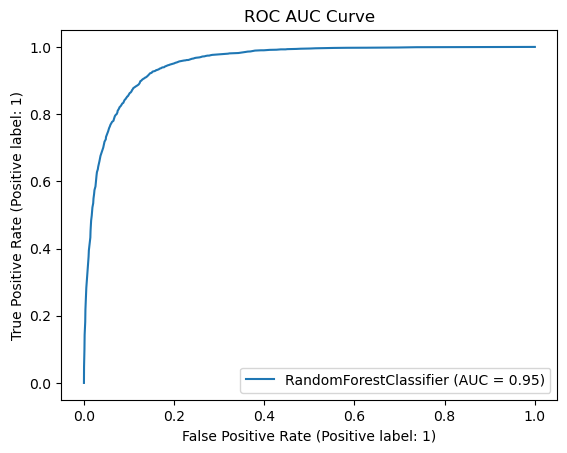

In [95]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

plot_roc_curve(grid_search.best_estimator_,X_test,Y_test)
plt.title('ROC AUC Curve')
plt.show()

# **Saving the Model¶


In [96]:
import joblib
joblib.dump(grid_search.best_estimator_,"CensusIncome.pkl")

['CensusIncome.pkl']

# **Testing/ Prediction**

In [97]:
#Loading the saved model
GCV_pred=joblib.load("CensusIncome.pkl")

#Prediction
prediction = GCV_pred.predict(X_test)
prediction

array([1, 0, 1, ..., 1, 1, 1])

In [98]:
pd.DataFrame([GCV_pred.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,9253,9254,9255,9256,9257,9258,9259,9260,9261,9262
Predicted,1,0,1,1,1,1,1,1,0,0,...,1,0,0,0,0,0,1,1,1,1
Actual,1,0,1,1,1,1,1,1,0,0,...,1,0,0,0,0,1,1,1,1,1
